In [ ]:
#importing libraries
import pandas as pd
print("Pandas imported successfully, version: "+pd.__version__)
import scipy as sm
from scipy.stats import *
print("SciPy imported successfully, version: "+sm.__version__)
import seaborn as sns
print("Seaborn imported successfully, version: "+sns.__version__)
sns.set(style="whitegrid")
import plotly
print("Plotly imported successfully, version: "+plotly.__version__)
from sklearn.decomposition import PCA #For performing principle component analysis

In [ ]:
#importing dataset
print()
print("For this report I will be using 'Students Performance in Exams' dataset from Kaggle available from: https://www.kaggle.com/spscientist/students-performance-in-exams")
print()
print("This dataset is most probably fictional and consits of Marks secured by the students in high school Students from the United States.")
df = pd.read_csv('StudentsPerformance.csv')

In [ ]:
#looking at the data
print(df.head(5))
print()
count_row = df.shape[0]
count_col = df.shape[1]
print("This dataset contains ", count_row, " entries and ", count_col, " properties for each entry: ", list(df.columns))

In [ ]:
#checking for missing data
B = df.isnull().sum()
print(B)
print()
print(" There is no missing data on this dataset")

In [ ]:
#gender preview

import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=df["gender"],
    name='Students', # name used in legend and hover labels
    xbins=dict( # bins used for histogram
        size=0.1
        
    ),
    marker_color='#EB89B6',
    opacity=0.75
))


fig.update_layout(
    title_text='Student gender distribution histogram', # title of plot
    xaxis_title_text='Gender', # xaxis label
    yaxis_title_text='Count', # yaxis label
    showlegend=True
   
    
)

fig.show()

males = df["gender"] == "male"
count_males = df[males].shape[0]
females = df["gender"] == "female"
count_females = df[females].shape[0]

print("Of ", count_row, " students there are ", count_males, " male students and ", count_females, " female students.")

In [ ]:
#Race preview
df= df.sort_values(by ='race/ethnicity' )
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=df["race/ethnicity"],
    name='Students', # name used in legend and hover labels
    xbins=dict( # bins used for histogram
        size=0.1
        
    ),
    marker_color='#EB89B6',
    opacity=0.75
))


fig.update_layout(
    title_text='Student race distribution histogram', # title of plot
    xaxis_title_text='Ethnicity', # xaxis label
    yaxis_title_text='Count', # yaxis label
    showlegend=True
   
    
)

fig.show()
A= df['race/ethnicity'].nunique()
B=df['race/ethnicity'].unique()
print("There are ", A, " different ethnical groups: ", B)

In [ ]:
#Parental level of education preview
A= df['parental level of education'].nunique()
B=df['parental level of education'].unique()

print("There are ", A, " different levels of education: ", B)
print("The correct descending order is: masters, bachelors, associate, some college, high school and some high school. For simplicity I will change values of levels of education from 1 to 6, 1 standing for 'some high school' and 6 for 'masters'")


df['parental level of education'].replace(['some high school'], value ='1', inplace=True)
df['parental level of education'].replace(['high school'], value ='2', inplace=True)
df['parental level of education'].replace(['some college'], value ='3', inplace=True)
df['parental level of education'].replace(["associate's degree"], value ='4', inplace=True)
df['parental level of education'].replace(["bachelor's degree"], value ='5', inplace=True)
df['parental level of education'].replace(["master's degree"], value ='6', inplace=True)




fig = go.Figure()
fig.add_trace(go.Histogram(
    x=df["parental level of education"],
    name='Students', # name used in legend and hover labels
    xbins=dict( # bins used for histogram
        size=0.5


        
    ),
    marker_color='#EB89B6',
    opacity=0.75
))


fig.update_layout(
    title_text='Parental level of education distribution histogram', # title of plot
    xaxis_title_text='Level of education', # xaxis label
    yaxis_title_text='Count', # yaxis label
    showlegend=True
   
    
)

fig.show()

In [ ]:
#Lunch preview

import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=df["lunch"],
    name='Students', # name used in legend and hover labels
    xbins=dict( # bins used for histogram
        size=0.1
        
    ),
    marker_color='#EB89B6',
    opacity=0.75
))


fig.update_layout(
    title_text='Student lunch distribution histogram', # title of plot
    xaxis_title_text='Lunch type', # xaxis label
    yaxis_title_text='Count', # yaxis label
    showlegend=True
   
    
)

fig.show()
standard = df["lunch"] == "standard"
count_standard = df[standard].shape[0]
free_reduced = df["lunch"] == "free/reduced"
count_free_reduced= df[free_reduced].shape[0]

print(count_standard/count_row*100, "% students eat standard lunch and",count_free_reduced/count_row*100,  "% students eat free/reduced lunch in high schools.")

In [ ]:
#test preparation preview

import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=df["test preparation course"],
    name='Students', # name used in legend and hover labels
    xbins=dict( # bins used for histogram
        size=0.1
        
    ),
    marker_color='#EB89B6',
    opacity=0.75
))


fig.update_layout(
    title_text='Student test preparation distribution histogram', # title of plot
    xaxis_title_text='Test preparation course', # xaxis label
    yaxis_title_text='Count', # yaxis label
    showlegend=True
   
    
)

fig.show()
compl = df["test preparation course"] == "completed"
count_compl = df[compl].shape[0]
none = df["test preparation course"] == "none"
count_none= df[none].shape[0]

print(count_compl/count_row*100, "% students completed test preparation course and",count_none/count_row*100,  "% students did not.")

math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


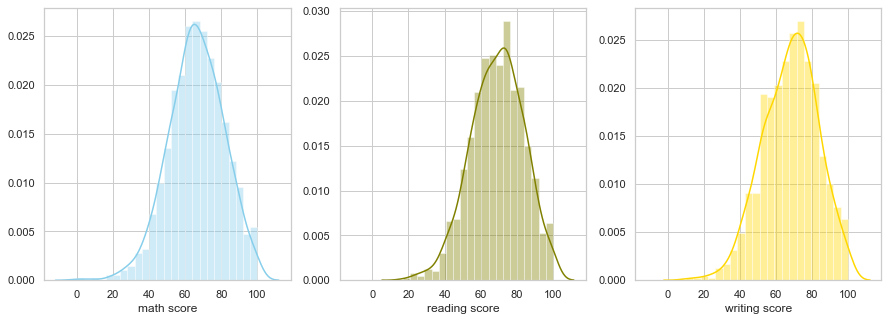

In [83]:
#Test results preview
print(df.describe())
import matplotlib.pyplot as plt
f, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
sns.distplot( df["math score"] , color="skyblue", ax=axes[0])
sns.distplot( df["reading score"] , color="olive", ax=axes[1])
sns.distplot( df["writing score"] , color="gold", ax=axes[2])
